In [2]:
import numpy as np
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, precision_recall_fscore_support
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("C:/Users/kavya/OneDrive/Desktop/Spring2023_890/LoanFHLBData/original/y_2009.csv")
df.drop(['LoanNumber', 'AssignedID', 'Coop', 'Program', 'AcquDate', 'MortDate', 'Bed1', 'Bed2', 'Bed3', 'Bed4', 'Aff1',
         'Aff2', 'Aff3', 'Aff4', 'Occup', 'NumUnits', 'RentUt1', 'RentUt2', 'RentUt3', 'Product', 'RentUt4', 'Rent1',
         'Rent2', 'Rent3', 'Rent4', 'FeatureID', 'SellType', 'Seller', 'SellCity', 'SellSt', 'CICA', 'LienStatus',
         'FedFinStbltyPlan', 'GSEREO'], axis=1, inplace=True)
# df_1=df['BoGender']

dk = pd.read_csv("C:/Users/kavya/OneDrive/Desktop/Spring2023_890/LoanFHLBData/original/y_2009.csv")



In [4]:
dff = pd.read_csv("C:/Users/kavya/OneDrive/Desktop/Spring2023_890/LoanFHLBData/original/LoanData_preprocessed.csv")

# print(df)
dk = pd.DataFrame()
dk = dff[['FHLBankID', 'FIPSStateCode']]
df.isna().sum()
aa = dff[['FHLBankID', 'FIPSStateCode']]
fill_values = dict(dk.groupby('FIPSStateCode')['FHLBankID'].apply(lambda x: x.dropna().mode()[0]))

df['FHLBankID'] = df.apply(lambda x: fill_values[x['FIPSStateCode']] if pd.isnull(x['FHLBankID']) else x['FHLBankID'],
                           axis=1)
df.isna().sum()

Year              0
FHLBankID         0
FIPSStateCode     0
FIPSCountyCode    0
MSA               0
Tract             0
MinPer            0
TraMedY           0
LocMedY           0
Tractrat          0
Income            0
CurAreY           0
IncRat            0
UPB               0
LTV               0
Purpose           0
FedGuar           0
Term              0
AmorTerm          0
FHFBID            0
NumBor            0
First             0
BoRace            0
CoRace            0
BoGender          0
CoGender          0
BoAge             0
CoAge             0
Geog              0
Rate              0
Amount            0
Front             0
Back              0
BoCreditScor      0
CoCreditScor      0
PMI               0
Self              0
PropType          0
ArmIndex          0
ArmMarg           0
PrepayP           0
BoEth             0
Race2             0
Race3             0
Race4             0
Race5             0
CoEth             0
Corace2           0
Corace3           0
Corace4           0


In [5]:
fhlbankid_encoder = LabelEncoder()
df['FHLBankID'] = fhlbankid_encoder.fit_transform(df['FHLBankID'])
proptype_encoder = LabelEncoder()
df['PropType'] = proptype_encoder.fit_transform(df['PropType'])

In [6]:
def date_to_numeric(date):
    if pd.isna(date):
        return 0
    else:
        try:
            date_obj = pd.to_datetime(date)
            if date_obj.year < 1970 or date_obj.year > 2100:
                return 0
            else:
                return int(date_obj.timestamp())
        except ValueError:
            return 0


df['PrepayP'] = df['PrepayP'].apply(date_to_numeric)

In [7]:
x= df. loc[:, df. columns != 'BoGender']
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)

In [8]:
kmeans = KMeans(2)
kmeans.fit(x)
kmeans_3 = KMeans(3)
kmeans_3.fit(x)
cluster = kmeans.fit_predict(x)

cluster_3 = kmeans_3.fit_predict(x)
cluster
df['Clusters'] = cluster
df['Clusters_3'] = cluster_3

C:\Users\kavya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kavya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kavya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kavya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


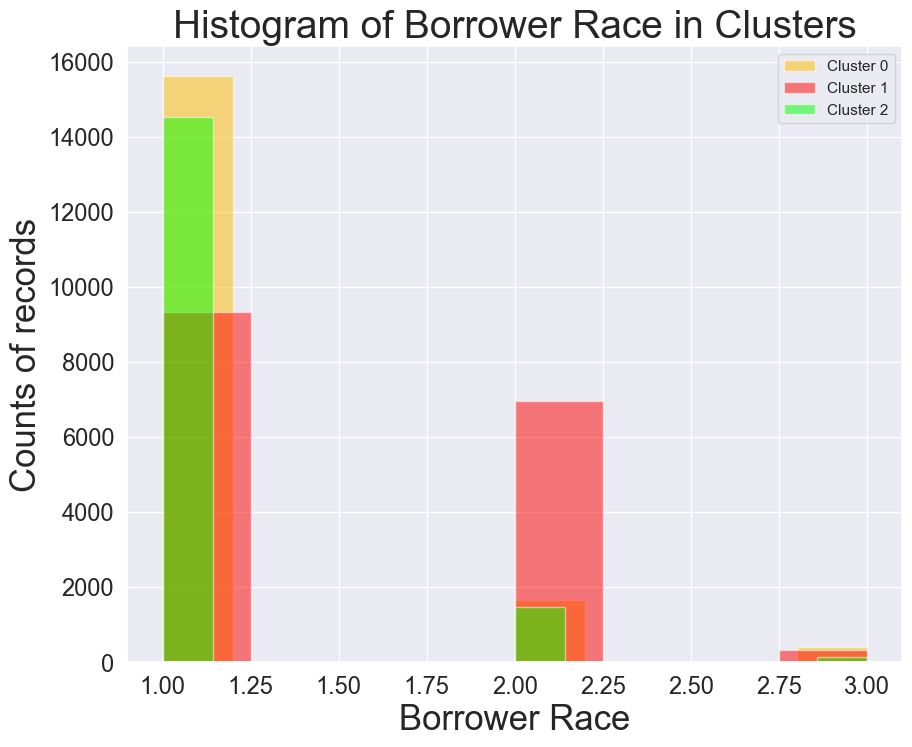

In [9]:
df['BoGender']=dff['BoGender']
cluster_0 = df[df['Clusters_3']==0 ]
cluster_1 = df[df['Clusters_3'] ==1]
cluster_2 = df[df['Clusters_3'] ==2]
# cluster_3 = df[df['cluster']==3 ]
# cluster_4 = df[df['cluster'] ==4]
# cluster_5 = df[df['cluster'] ==5]
# cluster_6 = df[df['cluster'] ==6]

# Create a histogram plot using matplotlib for each cluster and borrower race
plt.figure(figsize=(10, 8))
plt.hist(cluster_0['BoGender'], bins=10, alpha=0.5, color="#FFBB00", label='Cluster 0')
plt.hist(cluster_1['BoGender'], bins=8, alpha=0.5, color="#FF0000", label='Cluster 1')
plt.hist(cluster_2['BoGender'], bins=14, alpha=0.5, color="#00FF00", label='Cluster 2')
# plt.hist(cluster_3['BoRace'], bins=6, alpha=0.5, color="#800080", label='Cluster 3')
# plt.hist(cluster_4['BoRace'], bins=4, alpha=0.5, color="#BDB5D5", label='Cluster 4')
# plt.hist(cluster_5['BoRace'], bins=12, alpha=0.5, color="#953553", label='Cluster 5')
# plt.hist(cluster_6['BoRace'], bins=11, alpha=0.5, color="#2471A3", label='Cluster 6')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
# Set labels and title
plt.xlabel('Borrower Race',fontsize=25)
plt.ylabel('Counts of records',fontsize=25)
plt.title('Histogram of Borrower Race in Clusters',fontsize=28)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [57]:
cluster_counts = df['Clusters_3'].value_counts()
print(cluster_counts)
cluster_counts = df['BoGender'].value_counts()
print(cluster_counts)

2    17701
1    16643
0    16158
Name: Clusters_3, dtype: int64
1    39525
2    10098
3      879
Name: BoGender, dtype: int64


0    15643
2    14546
1     9336
Name: Clusters_3, dtype: int64
1    6977
0    1658
2    1463
Name: Clusters_3, dtype: int64
0    399
1    330
2    150
Name: Clusters_3, dtype: int64


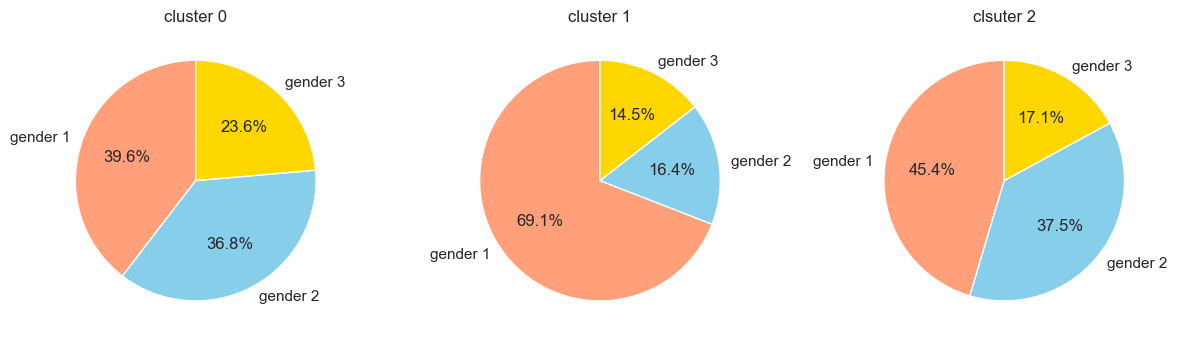

In [10]:
cl = df[df['BoGender']==1]
print(cl['Clusters_3'].value_counts())
X=cl['Clusters_3'].value_counts()
cl = df[df['BoGender']==2]
print(cl['Clusters_3'].value_counts())
Y=cl['Clusters_3'].value_counts()
cl = df[df['BoGender']==3]
print(cl['Clusters_3'].value_counts())
Z=cl['Clusters_3'].value_counts()
cluster_count=[X,Y,Z]
# Plotting the pie charts
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
cluster_labels = ['cluster 0','cluster 1','clsuter 2' ]
gender_colors = ['#FFA07A', '#87CEEB', '#FFD700']
for i, ax in enumerate(axes):
    # Data for the current cluster
    cluster_data = cluster_count[i]

    # Plotting the pie chart
    ax.pie(cluster_data, labels=['gender 1','gender 2','gender 3'], colors=gender_colors, autopct='%1.1f%%', startangle=90)
    ax.set_title(cluster_labels[i])

# Adjusting the layout and displaying the chart
plt.tight_layout()
plt.show()

In [58]:
cl = df[df['BoGender']==1]
print(cl['Clusters_3'].value_counts())
cl = df[df['BoGender']==2]
print(cl['Clusters_3'].value_counts())
cl = df[df['BoGender']==3]
print(cl['Clusters_3'].value_counts())

2    15644
0    14545
1     9336
Name: Clusters_3, dtype: int64
1    6977
2    1658
0    1463
Name: Clusters_3, dtype: int64
2    399
1    330
0    150
Name: Clusters_3, dtype: int64


In [1]:
cl = df[df['BoGender']==1]
print(cl['Clusters_3'].value_counts())
X=cl['Clusters_3'].value_counts()
cl = df[df['BoGender']==2]
print(cl['Clusters_3'].value_counts())
Y=cl['Clusters_3'].value_counts()
cl = df[df['BoGender']==3]
print(cl['Clusters_3'].value_counts())
Z=cl['Clusters_3'].value_counts()
cluster_count=[X,Y,Z]
# Plotting the pie charts
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
cluster_labels = ['cluster 0','cluster 1','clsuter 2' ]
gender_colors = ['#FFA07A', '#87CEEB', '#FFD700']
for i, ax in enumerate(axes):
    # Data for the current cluster
    cluster_data = cluster_count[i]

    # Plotting the pie chart
    ax.pie(cluster_data, labels=['gender 1','gender 2','gender 3'], colors=gender_colors, autopct='%1.1f%%', startangle=90)
    ax.set_title(cluster_labels[i])

# Adjusting the layout and displaying the chart
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

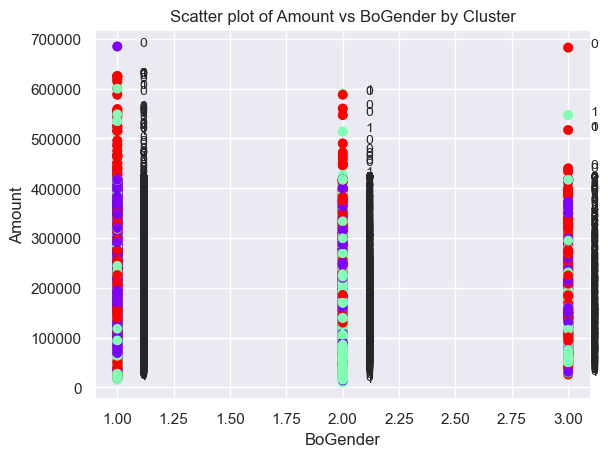

In [59]:

plt.scatter(df["BoGender"], df['Amount'], c=df['Clusters_3'], cmap='rainbow')
import matplotlib.pyplot as plt

plt.scatter(df["BoGender"], df['Amount'], c=df['Clusters_3'], cmap='rainbow')

for i, label in enumerate(df['Clusters']):
    plt.text(df['BoGender'][i] + 0.1, df['Amount'][i] + 0.1, label, fontsize=10)

plt.xlabel('BoGender')
plt.ylabel('Amount')
plt.title('Scatter plot of Amount vs BoGender by Cluster')
plt.show()

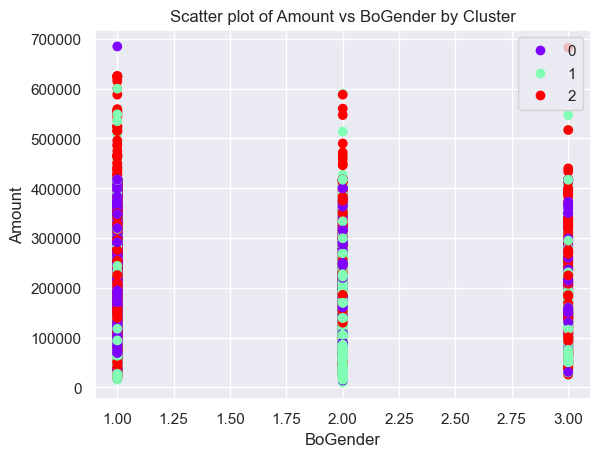

In [60]:

import matplotlib.pyplot as plt

scatter = plt.scatter(df["BoGender"], df['Amount'], c=df['Clusters_3'], cmap='rainbow')
handles, labels = scatter.legend_elements()

# create legend

legend = plt.legend(handles, labels, loc='upper right')
plt.xlabel('BoGender')
plt.ylabel('Amount')
plt.title('Scatter plot of Amount vs BoGender by Cluster')

# show plot
plt.show()

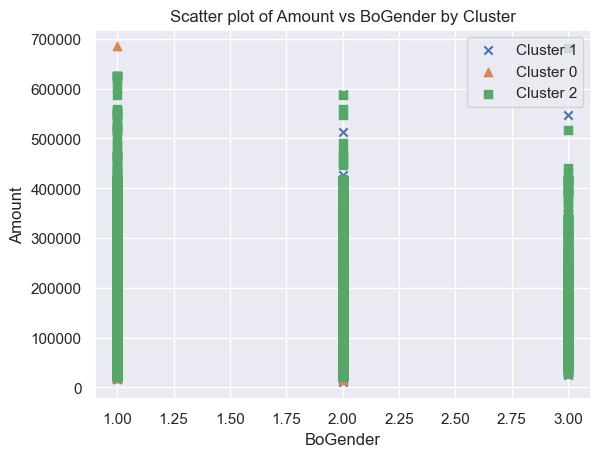

In [61]:

import matplotlib.pyplot as plt

# set up shapes for each cluster
markers = ['x', '^', 's']

# create scatter plot with markers for each cluster
for i, cluster in enumerate(df['Clusters_3'].unique()):
    mask = df['Clusters_3'] == cluster
    plt.scatter(df[mask]['BoGender'], df[mask]['Amount'], marker=markers[i], label=f'Cluster {cluster}')

# add labels and title
plt.xlabel('BoGender')
plt.ylabel('Amount')
plt.title('Scatter plot of Amount vs BoGender by Cluster')

# add legend
plt.legend()

# show plot
plt.show()

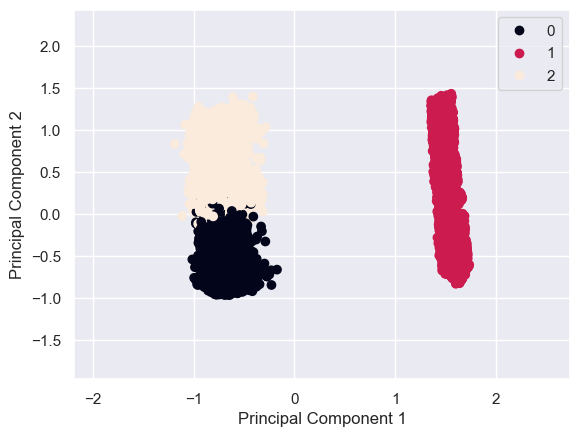

In [62]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
# fit PCA on iris dataset
X_pca = pca.fit_transform(x)
cluster_names_str = [str(name) for name in df['Clusters_3']]
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Clusters_3'])
handles, labels = scatter.legend_elements()

# create legend

legend = plt.legend(handles, labels, loc='upper right')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
x_min, x_max = np.min(X_pca[:, 0]), np.max(X_pca[:, 0])
y_min, y_max = np.min(X_pca[:, 1]), np.max(X_pca[:, 1])

# set the x and y limits
plt.xlim(x_min - 1, x_max + 1)
plt.ylim(y_min - 1, y_max + 1)
plt.show()

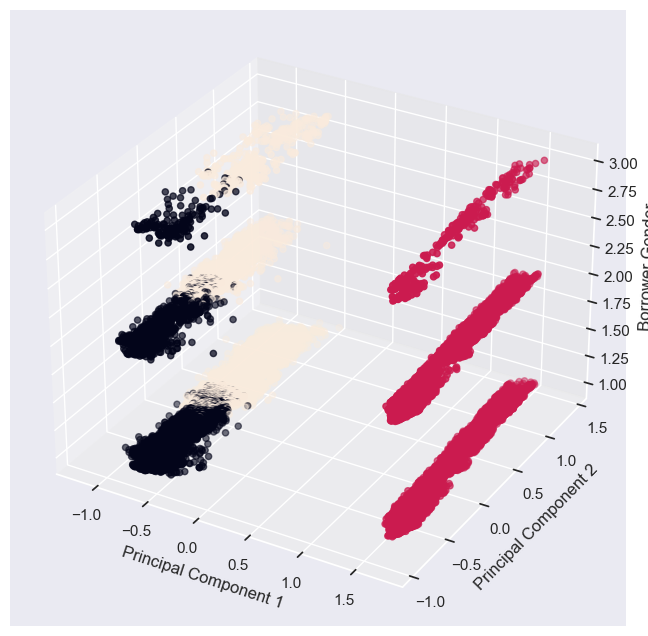

In [63]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))

# fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], df['BoGender'], c=df['Clusters_3'])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Borrower Gender')


# Add interactivity
def on_move(event):
    if event.inaxes == ax:
        ax.view_init(elev=30, azim=event.xdata)


fig.canvas.mpl_connect('motion_notify_event', on_move)

plt.show()